which ad platform is more effective in terms of clicks, conversions and overall cost-effectiveness?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('marketing_campaign.csv')

In [31]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


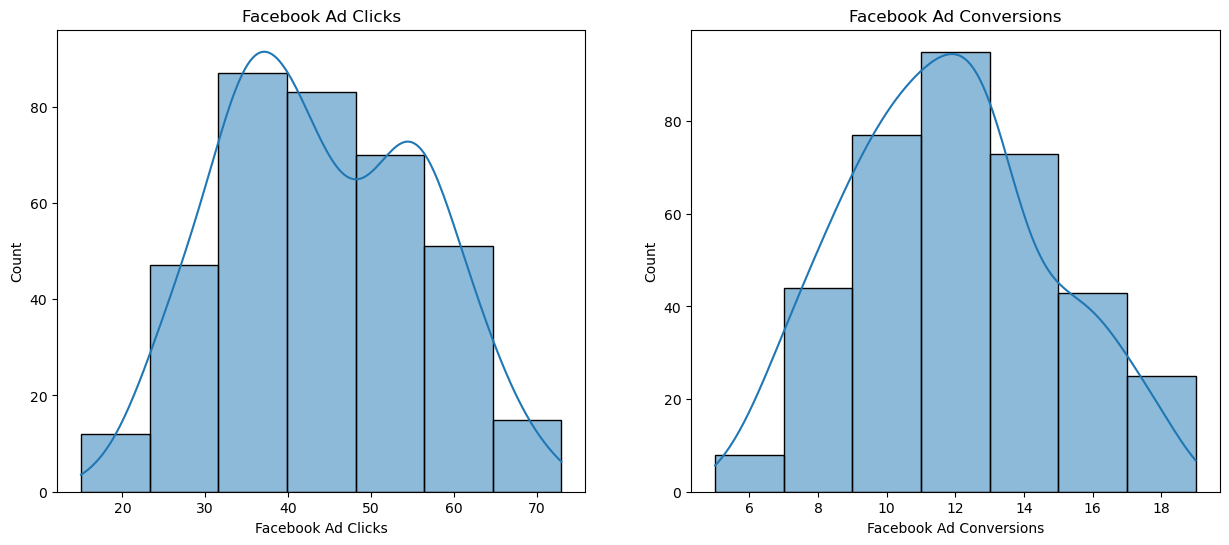

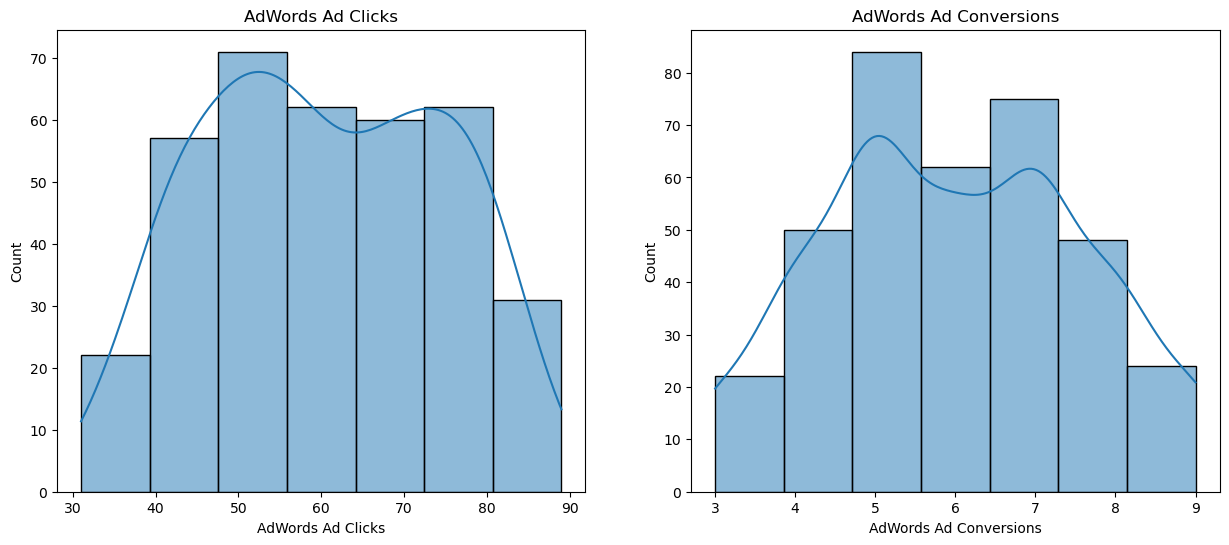

In [38]:
# distribution of clicks and conversions

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins=7, edgecolor='k', kde=True)
plt.subplot(1, 2, 2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins=7, edgecolor='k', kde=True)
plt.subplot(1, 2, 2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

how frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [39]:
# calculate category for the conversions

def conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('11 - 15')
        else:
            category.append('more than 15')
    return category

df['Facebook Conversion Category'] = conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = conversion_category('AdWords Ad Conversions')

In [40]:
df[['Facebook Ad Conversions', 'Facebook Conversion Category', 'AdWords Ad Conversions', 'AdWords Conversion Category']]


,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,11 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10
...,...,...,...,...
360,13,11 - 15,9,6 - 10
361,18,more than 15,6,6 - 10
362,13,11 - 15,6,6 - 10
363,8,6 - 10,6,6 - 10


In [41]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
11 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [17]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})


In [42]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [43]:
adword = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})


In [44]:
category_df = pd.merge(facebook, adword, on='Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,11 - 15,341,0.0
1,6 - 10,337,209.0
2,less than 6,65,156.0
3,more than 15,257,0.0


In [45]:
category_df = category_df.iloc[[2, 1, 0, 3]]
category_df

,Category,count_x,count_y
2,less than 6,65,156.0
1,6 - 10,337,209.0
0,11 - 15,341,0.0
3,more than 15,257,0.0


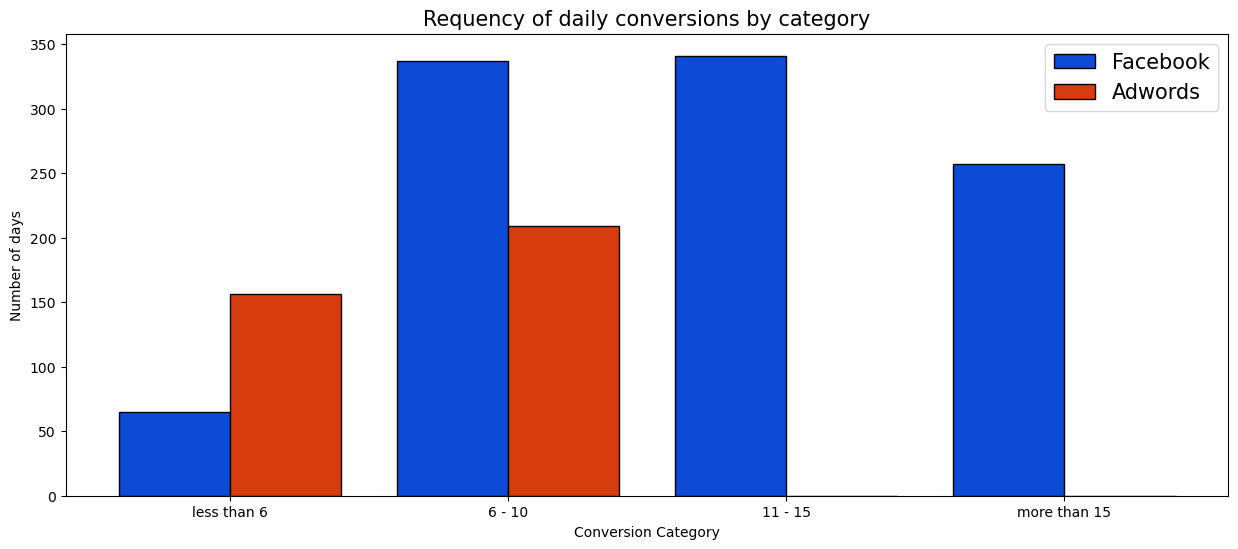

In [46]:
X_axis = np.arange(len(category_df))

plt.figure(figsize = (15,6))
plt.bar(X_axis-0.2, category_df['count_x'], 0.4, label='Facebook', color='#0D4AD6', linewidth=1, edgecolor='k')
plt.bar(X_axis+0.2, category_df['count_y'], 0.4, label='Adwords', color='#D63C0D', linewidth=1, edgecolor='k')

plt.xticks(X_axis, category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.title('Frequency of daily conversions by category', fontsize=15)
plt.legend(fontsize=15)
plt.show()

Data suggests facebook had more frequent higher conversion days than adwords(either had very low conversions rates or moderate ones).
There is a significant variance in the number of high conversions days between two different campaigns.
The absence of any days with conversion more than 10, in adwords indicates a need to review that strategies were changed or some external factors could have influenced these numbers.


do more clicks on the ad really lead to more sales?

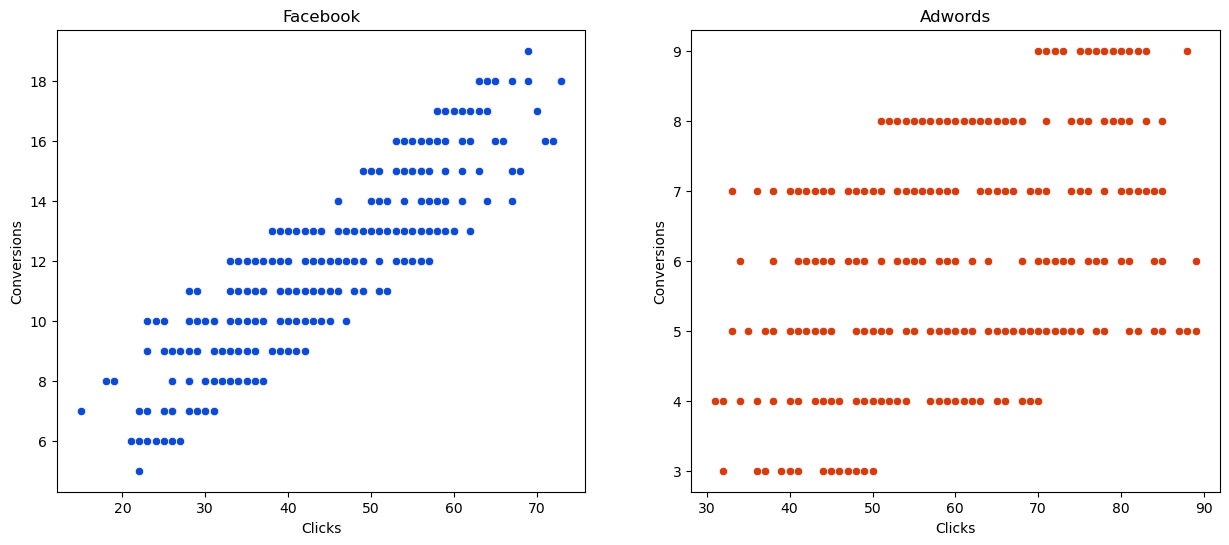

In [47]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('Facebook')
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#0D4AD6')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1, 2, 2)
plt.title('Adwords')
sns.scatterplot(x=df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], color='#D63C0D')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [48]:
f_corr = df[['Facebook Ad Conversions', 'Facebook Ad Clicks']].corr()
print(f_corr)

a_corr = df[['AdWords Ad Conversions', 'AdWords Ad Clicks']].corr()
print(a_corr)

                         Facebook Ad Conversions  Facebook Ad Clicks
Facebook Ad Conversions                 1.000000            0.873775
Facebook Ad Clicks                      0.873775            1.000000
                        AdWords Ad Conversions  AdWords Ad Clicks
AdWords Ad Conversions                1.000000           0.447993
AdWords Ad Clicks                     0.447993           1.000000


1. A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on facebook ads and sales. This suggests that as the number of clicks increases, sales tend to increase as well. This strong correlation suggests that facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on facebook ads. Increasing investment in facebook ads or optimizing their performance could potentially lead to even higher sales.

2. A correlation coefficient of 0.45  indicates a moderate positive linear relationship between clicks on adwords ads and sales. While there is still a positive relationship, it is not as strong as compared to facebook. The moderate correlation betweem clicks and sales indicates that while adwords advertising does contribute to sales, its effectiveness may be influenced by other factors and further analysis is needed to identify these factors and optimize adwords campaigns accordingly.

Hypothesis Testing

Hypothesis - advertising on facebook will result in a greater number of conversions compared to advertising on adwords.

Null hypothesis - there is no difference in the number of conversions between facebook and adwords.

Alternate hypothesis - the number of conversions from facebook is greater than the number of conversions from adwords.


In [49]:
print('Mean Conversion')
print('Facebook = ', round(df['Facebook Ad Conversions'].mean(), 2))
print('AdWords = ', round(df['AdWords Ad Conversions'].mean(), 2))

Mean Conversion
Facebook =  11.74
AdWords =  5.98


In [51]:
t_stats, p_value = st.ttest_ind(a=df['Facebook Ad Conversions'], b=df['AdWords Ad Conversions'], equal_var=False)
print('T Statistics')
print(t_stats)
print(p_value)

if p_value < 0.05:
    print('p-value is less than significance value, reject the null hypothesis')
else:
    print('p-value is greater than significance value, cannot reject the null hypothesis')

T Statistics
32.88402060758184
9.348918164530465e-134
p-value is less than significance value, reject the null hypothesis


The mean number of conversions from facebook is substantially higher than the mean number from adwords. This suggests that, on average, facebook advertising is more effective in generating conversions compared to adwords advertising.

The t statistics is a measure of the difference betwen the means of the two groups relative to the variation within the groups. A larger t statistic indicates a greater difference between the means of the two groups. The p-value is extremely small, indicating strong evidence against the null hypothesis. In short, the number of conversions from facebook advertsising is indeed greater than the number of conversions from adwords advertising.

Facebook advertising appears to be a more effective channel for generating conversions compared to adwords advertising, based on the sample data analyzed.

Given the significant difference in conversion rates, one can consider reallocating resources towards facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.


How likely is it that Facebook truly performs better?

In [77]:


df = pd.read_csv('marketing_campaign.csv')

fb_views = df["Facebook Ad Views"].sum()
fb_conversions = df["Facebook Ad Conversions"].sum()

aw_views = df["AdWords Ad Views"].sum()
aw_conversions = df["AdWords Ad Conversions"].sum()

print("Facebook:", fb_conversions, "conversions out of", fb_views, "views")
print("AdWords :", aw_conversions, "conversions out of", aw_views, "views")

# Set prior (non-informative Beta(1,1))
alpha_prior, beta_prior = 1, 1

# Posterior params
alpha_fb = alpha_prior + fb_conversions
beta_fb = beta_prior + fb_views - fb_conversions

alpha_aw = alpha_prior + aw_conversions
beta_aw = beta_prior + aw_views - aw_conversions

# Draw posterior samples
n_samples = 100_000
samples_fb = np.random.beta(alpha_fb, beta_fb, size=n_samples)
samples_aw = np.random.beta(alpha_aw, beta_aw, size=n_samples)

# Posterior probability Facebook > AdWords
prob_fb_better = np.mean(samples_fb > samples_aw)

# Posterior lift (relative difference)
lift = (samples_fb - samples_aw) / samples_aw

print(f"Posterior mean conv rate – Facebook: {samples_fb.mean():.4%}")
print(f"Posterior mean conv rate – AdWords : {samples_aw.mean():.4%}")
print(f"Prob(Facebook conv rate > AdWords) = {prob_fb_better:.3f}")

# 95% credible interval for lift
ci_lower, ci_median, ci_upper = np.percentile(lift, [2.5, 50, 97.5])
print(f"Estimated lift (Facebook vs AdWords):")
print(f"  median: {ci_median:.2%}")
print(f"  95% CI: [{ci_lower:.2%}, {ci_upper:.2%}]")


Facebook: 4286 conversions out of 795586 views
AdWords : 2183 conversions out of 1721777 views
Posterior mean conv rate – Facebook: 0.5389%
Posterior mean conv rate – AdWords : 0.1269%
Prob(Facebook conv rate > AdWords) = 1.000
Estimated lift (Facebook vs AdWords):
  median: 324.80%
  95% CI: [303.55%, 347.27%]


Facebook’s conversion rate is ~4.25× higher than AdWords.

There is a 100% posterior probability that Facebook has a higher conversion rate than AdWords.

Facebook produces ~325% more conversions compared to AdWords on average. Even in the worst case (2.5th percentile), Facebook still drives 303% more conversions. In the best case (97.5th percentile), Facebook drives 347% more conversions.

Facebook is consistently 3×–3.5× more effective than AdWords.


Regression analysis

What will happen when I actaully go with the facebook ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [53]:
# independent variable
x = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

model = LinearRegression()
model.fit(x, y)
pred = model.predict(x)

r2 = r2_score(y, pred)*100
mse = mean_squared_error(y, pred)

print('Accuracy (R2 score) = ', r2)
print('Mean squared error = ', mse)

Accuracy (R2 score) =  76.34827765960227
Mean squared error =  2.017713387008563


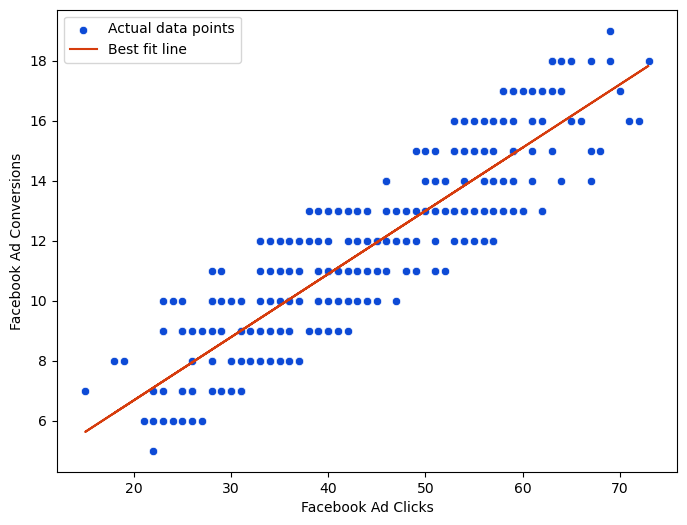

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#0D4AD6', label='Actual data points')
plt.plot(df['Facebook Ad Clicks'], pred, color='#D63C0D', label='Best fit line')
plt.legend()
plt.show()

In [55]:
print('For 50 clicks, Expected Conversion - ', round(model.predict([[50]])[0][0],2))
print('For 80 clicks, Expected Conversion - ', round(model.predict([[80]])[0][0],2))

For 50 clicks, Expected Conversion -  13.0
For 80 clicks, Expected Conversion -  19.31


The model has a reasonably good prediction, with an r2 score of 76.35%. This suggests that it can effectively predict facebook ad conversions based on the number of facebook ad clicks. With the insights provided by the linear regression model, businesses can make informed decisions about resource allocation, budget planning and campaign optimization. For instance, knowing the expected number of facebook ad conversions based on a certain number of facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of facebook advertsisng efforts.


Analyzing facebook campaign metrics over time

In [57]:
# clean data

df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x:float(x[:-1]))

df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x:float(x[:-1]))

df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x:float(x[1:]))

df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x:float(x[1:]))


In [58]:
# filtering for facebook campaign

df = df[['Date','Facebook Ad Views', 'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

At what times of the month or days of the week do we observe the conversions?

In [59]:
# extract month and week day

df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

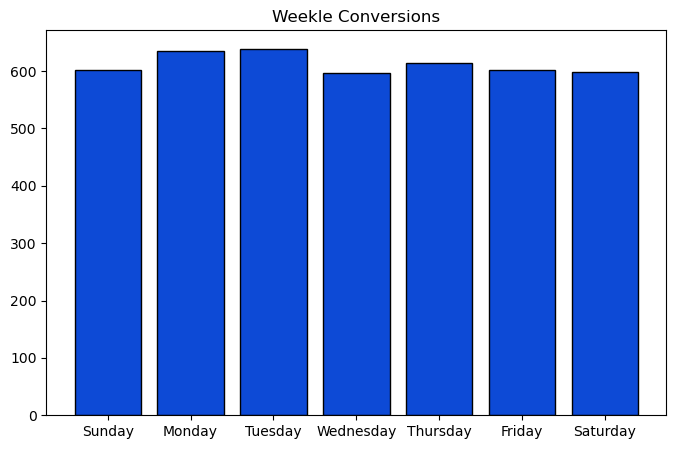

In [62]:
plt.figure(figsize=(8,5))
plt.title('Weekle Conversions')
weekly = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_name = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(week_name, weekly['Facebook Ad Conversions'], color='#0D4AD6', edgecolor='k')
plt.show()

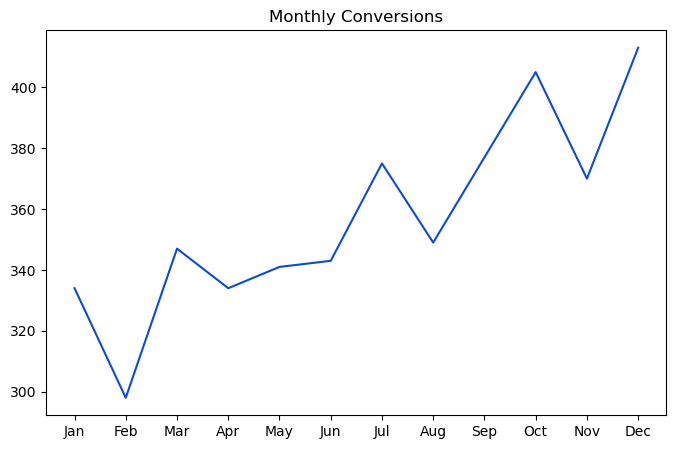

In [64]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_name, monthly['Facebook Ad Conversions'], color='#0D4AD6')
plt.show()

Accross the weekdays, the total number of conversions remains relatively consistent indicating a consistent level of engagement throughout the week. However mondays and tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.

Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However certain months stand out with variations in conversion rates.
Some months experience a decline in conversions. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior or adjustments in marketing strategies.

How does the cost per conversion (cpc) trend over time?

CPC is used to evaluate the cost of effectiveness and profitability of an online advertising campaign.
This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.


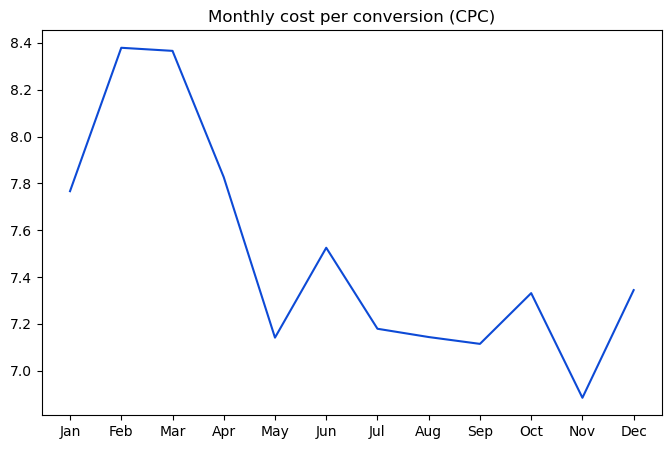

In [66]:
plt.figure(figsize=(8,5))
plt.title('Monthly cost per conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_name, monthly_df['Cost per Conversion'], color='#0D4AD6')
plt.show()

CPC trend over the 12 month period shows some fluctuations but overall maintains a relatively stable range.
May and Nov have the lowest cpc values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
Feb has the highest cpc value, suggesting that advertising costs may be relatively higher during this month compared to others.
Lower cpc values in certain months could indicate periods of higher advertising effectiveness or more favorable market conditions.
One should consider allocating more advertising budget to months with historically lower cpc values to maximize ROI.

Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?


In [67]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score - ', score)
print('p-value - ', p_value)

if p_value < 0.05:
    print('p-value is less than significance value, reject the null hypothesis')
else:
    print('p-value is greater than significance value, cannot reject the null hypothesis')

Cointegration test score -  -14.755428385103226
p-value -  2.1337375979060546e-26
p-value is less than significance value, reject the null hypothesis


Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrim relationship between advertising spend and conversions.

Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaings that demonstrate a strong return on investment and adjusting spending based on performance, companies can maximize conversions while minimizing costs.
